Here we analyze how the probability of cardio failure progresses with age for women, men, and everyone.

In [23]:
# Lets import the necessary packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.tree import DecisionTreeClassifier #now decision tree time
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# First verify that we can read the input data
input_filename = "C:\\Users\\anish\\OneDrive\\Documents\\Anisha\\science_fair\\cardio_train_not_normalized.csv "

new_data = pd.read_csv(input_filename)
new_data['age'] = new_data['age']/365
print(new_data.head())


         bmi        age  gender  ap_hi  ap_lo  cholesterol  gluc  smoke  alco  \
0  21.967120  50.391781       2    110     80            1     1      0     0   
1  34.927679  55.419178       1    140     90            3     1      0     0   
2  23.507805  51.663014       1    130     70            3     1      0     0   
3  28.710479  48.282192       2    150    100            1     1      0     0   
4  23.011177  47.873973       1    100     60            1     1      0     0   

   active  cardio  
0       1       0  
1       1       1  
2       0       1  
3       1       1  
4       0       0  


In [24]:
# Lets define the functions that we will need first
def plot_features(X, feature_list):
    """
    Plotting features
    """
    for feat in feature_list:
        plt.hist(X[feat], 32)
        plt.xlabel(feat)
        plt.show()
        
def get_cardio_probability(df, feat_name, bin_centers):
    """
    calculating cardio probability
    
    """
    gap = bin_centers[1] - bin_centers[0]
    list_prob = []
    for bin in bin_centers:
        truncated_data = filter_feature(df, feat_name, bin - gap/2, bin + gap/2) #calling filter_feature and getting a desginated chunk
        number_heart_failure = sum(truncated_data['cardio']) #calculating number of people who have heart failure
        total_cases = len(truncated_data["cardio"]) #number of total cases
        list_prob.append(number_heart_failure/total_cases) #calculating the probability
    return list_prob    

def filter_feature(dataframe, column_name,  threshold_low, threshold_hi):
    """
    removes outliers
    """
    x = dataframe[column_name]
    cond1 = x>threshold_low
    cond2 = x<threshold_hi
    cond3 = cond1 & cond2
    number_removed = len(cond3) - sum(cond3)
    truncated_data = dataframe[cond3]
    return truncated_data
    

[0.2556144728633812, 0.3832274459974587, 0.43829064132418655, 0.5134681181959565, 0.6024012930039252, 0.7115496227510156]


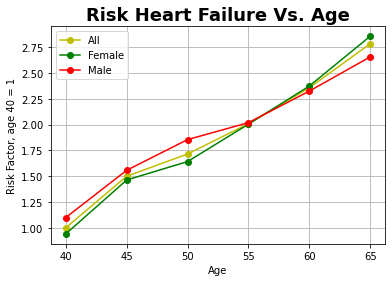

In [25]:
#calculating cardio probability for the entire dataset
ages = [40, 45, 50, 55, 60, 65]
prob_all = get_cardio_probability(new_data, "age", ages) #calling get_cardio_probability with the ages above
norm_factor = prob_all[0]
print(prob_all)

#calcuating cardio probability for men and women seperately
women_split = filter_feature(new_data, "gender", 0.5, 1.5) #splitting a seperate women dataset
men_split = filter_feature(new_data, "gender", 1.5, 2.5) #splitting a seperate men dataset

prob_women = get_cardio_probability(women_split, "age", ages) 
prob_men = get_cardio_probability(men_split, "age", ages)

#plotting the normalized probabilities for men, women, and everyone nicely onto one graph
plt.plot(ages, np.array(prob_all)/norm_factor, 'o-y')
plt.plot(ages, np.array(prob_women)/norm_factor, 'o-g')
plt.plot(ages, np.array(prob_men)/norm_factor, 'o-r')
plt.grid()
plt.title("Risk Heart Failure Vs. Age", fontsize = 18, fontweight = 'bold')
plt.xlabel('Age')
plt.ylabel('Risk Factor, age 40 = 1')
plt.legend(["All", "Female", "Male"])
plt.savefig("Risk of Heart Failure Vs. Age" + '.png', bbox_inches='tight')
plt.show()